 ## Visualization of Catalogue of Circumbinary Planets Discovered with the ETV Technique 

In [1]:
# import necessery library
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from astroquery.exoplanet_orbit_database import ExoplanetOrbitDatabase 
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive 
import astropy.units as u

In [2]:
#İmport all sheets from excel file separately by CUPS-ETV catalog 
System = pd.read_excel("System.xlsx")
Star = pd.read_excel("Star.xlsx")
Planet = pd.read_excel("Planet.xlsx")
Reference = pd.read_excel("Reference.xlsx")

In [3]:
#Create an indexes indicates columns that will use from Star Sheet
Radius = Star["Radius"]
Mass = Star["Mass"]
Temp = Star["T(Kelvin)"]

### HR Diagram for Primary and Secondary Stars in PCEB Systems

In [4]:
#Clean star names
#Separate the host star ("A") and secondary star ("B")
#Group them by name

Star["Star"] = Star["Star"].str.replace(r'\s+', ' ', regex=True).str.strip()
Star["Star"] = Star["Star"].str.lower().str.strip()
Host = Star[Star["Star"].str.endswith("a", na=False)]

Star["Star"] = Star["Star"].str.replace(r'\s+', ' ', regex=True).str.strip()
Star["Star"] = Star["Star"].str.lower().str.strip()
Secondary = Star[Star["Star"].str.endswith("b", na=False)]

#Compute the mean of some physical properties: temperature, mass, and radius for Luminosity equation
averages = Host.groupby("Star").agg({
    "T(Kelvin)": "mean",
    "Mass":"mean",
    "Radius" : "mean"
}).reset_index()

mean = Secondary.groupby("Star").agg({
    "T(Kelvin)": "mean",
    "Mass":"mean",
    "Radius" : "mean"
}).reset_index()


In [5]:
#Calculate Luminosity values for Host and Seconday Star
Lumo = ((mean["Radius"]**2)*(mean["T(Kelvin)"]/5772)**4)
Lumo2=((averages["Radius"]**2)*(averages["T(Kelvin)"]/5772)**4)

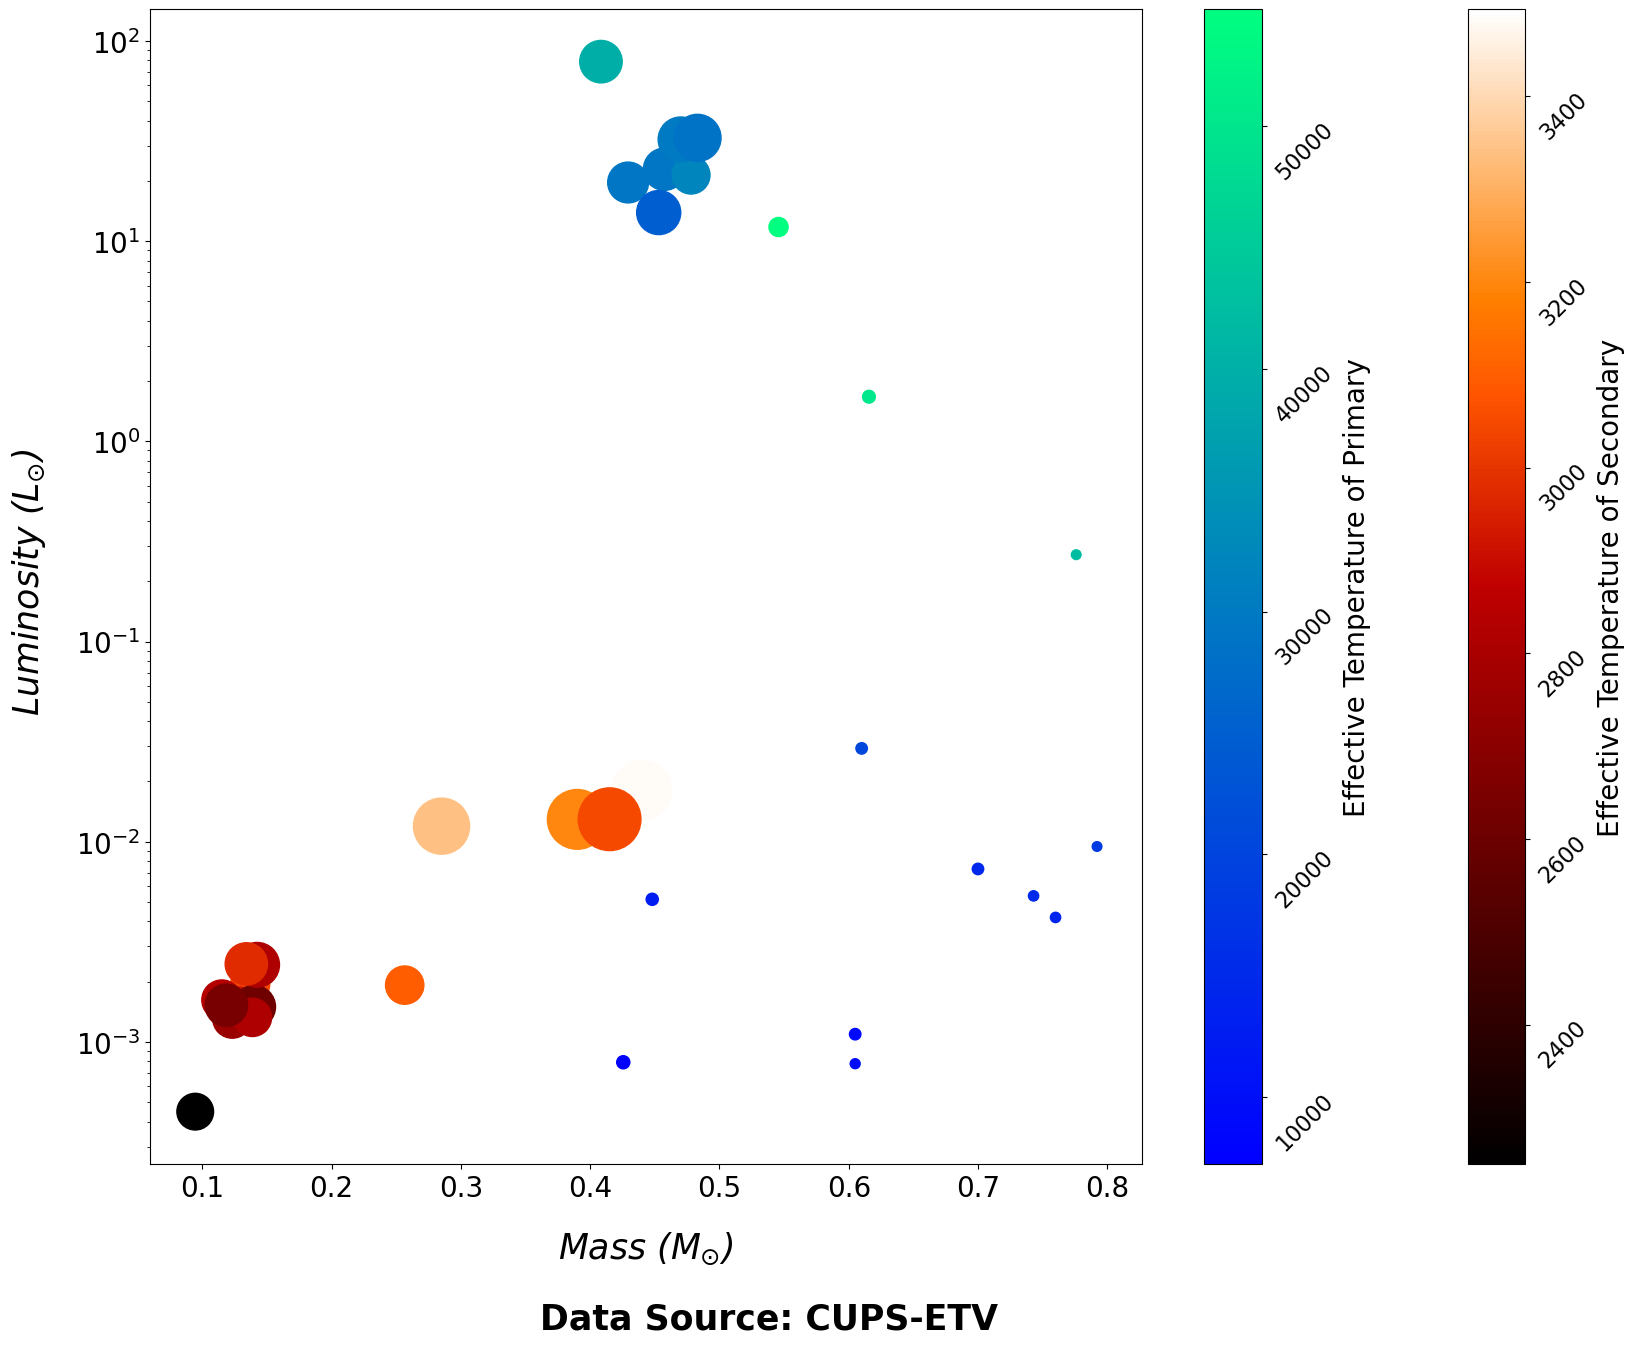

In [6]:
# Create HR Diagram graphic
plt.figure(figsize=(20, 15))

sc2 = plt.scatter(mean["Mass"], Lumo,
                  c=mean["T(Kelvin)"], cmap='gist_heat', s=mean["Radius"]*5000)

cbar2 = plt.colorbar(sc2)
cbar2.set_label('Effective Temperature of Secondary', fontsize=20 )  
cbar2.ax.tick_params(labelsize=16, labelrotation=45) 

sc1 = plt.scatter(averages["Mass"], Lumo2,
                  c=averages["T(Kelvin)"], cmap='winter', s=averages["Radius"]*5000)

cbar1 = plt.colorbar(sc1)
cbar1.set_label('Effective Temperature of Primary', fontsize=20)
cbar1.ax.tick_params(labelsize=16, labelrotation=45)  

plt.tick_params(axis='both', which='major', labelsize=20)
plt.yscale("log")
plt.xlabel(r"Mass ($M_{\odot}$)", fontsize=25, labelpad=20, fontstyle='italic')
plt.ylabel(r" Luminosity ($L_{\odot}$)", fontsize=25, labelpad=20, fontstyle='italic')
plt.figtext(0.32, 0.0001, "Data Source: CUPS-ETV", fontsize=25, color="black", fontweight='bold')
plt.savefig("UmixMass.png", dpi=300, bbox_inches='tight')
plt.show()


###

## Exoplanet Discovery Methods — NASA vs. CUPS-ETV Catalog

In [7]:
# Import and Filter NASA Data
nasa = pd.read_csv("PSCompPars_2024.09.03_05.15.16.csv")
nasa_filtered = nasa[(nasa['pl_orbper'] >= 10**-1) & (nasa['pl_orbper'] <= 10**5) &
                     (nasa['pl_bmassj'] >= 10**-4) & (nasa['pl_bmassj'] <= 10**2)]

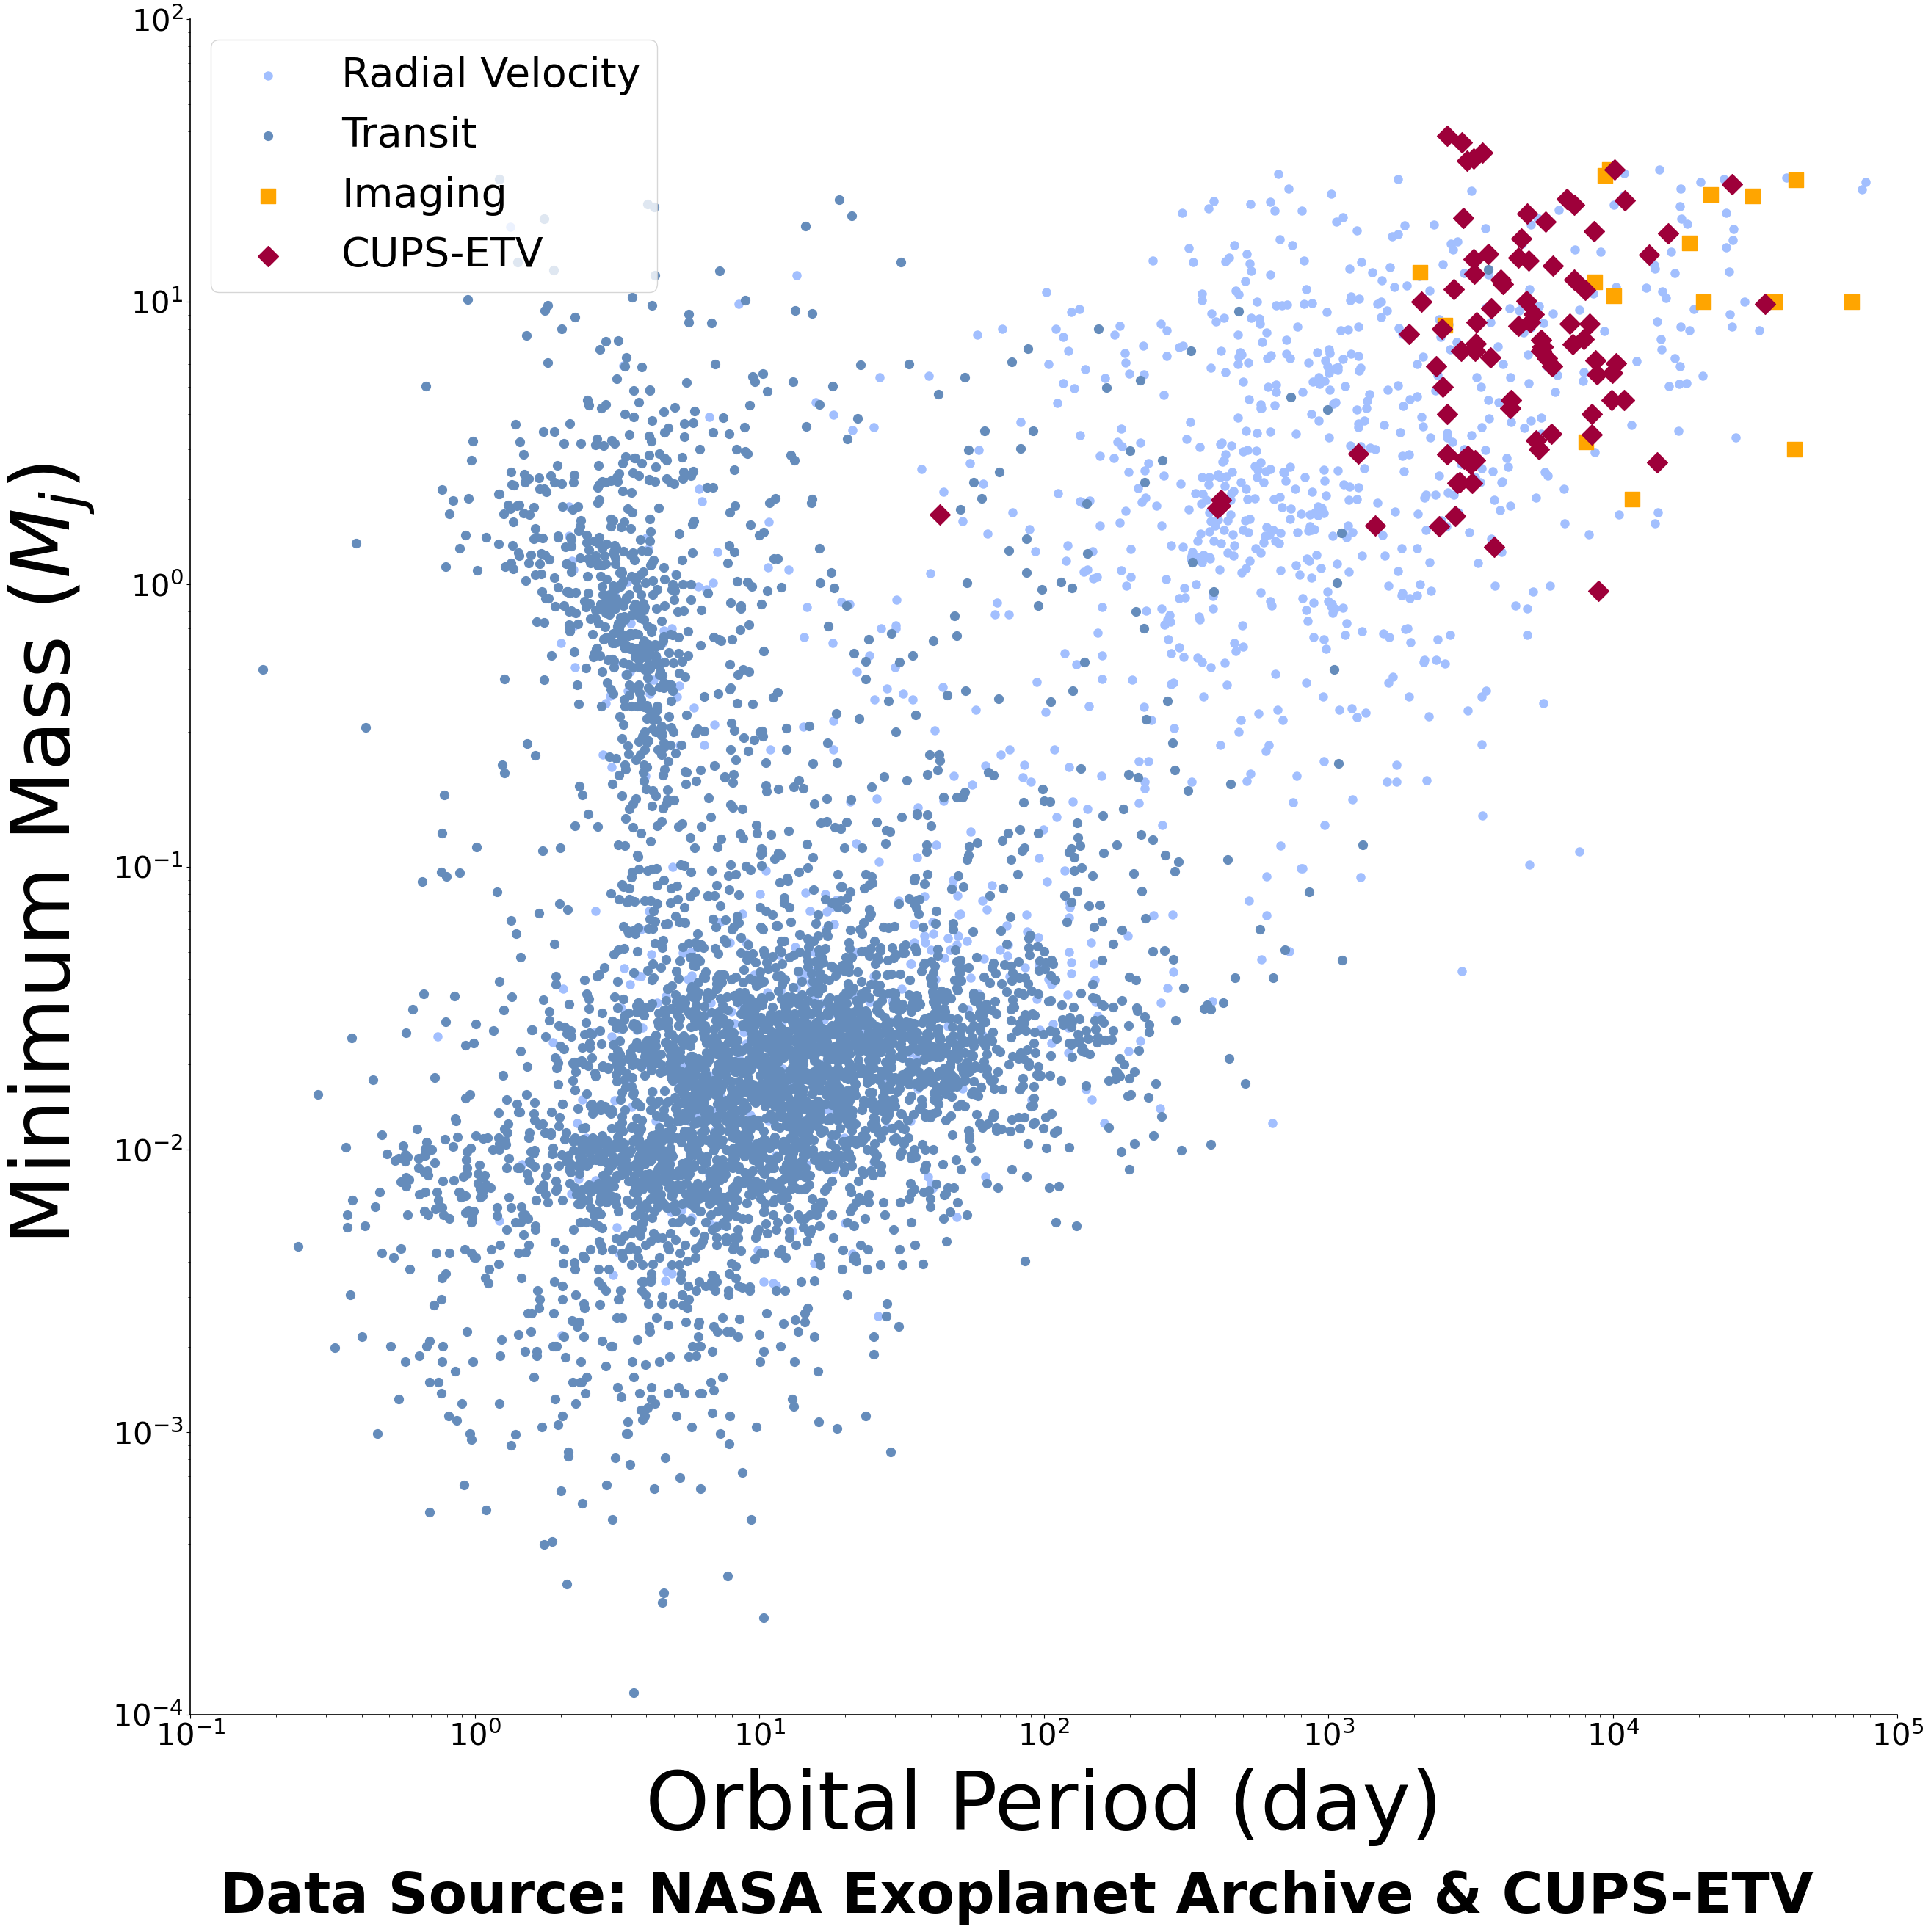

In [8]:
#Define Discovery Methods
colors_markers = {
    "Radial Velocity": ("#a2bffe", "o", 8),  
    "Transit": ("#658cbb", "o", 8.5),        
    "Imaging": ("orange", "s", 14),          
}

fig, ax = plt.subplots(figsize=(30, 30))
plt.tick_params(axis='both', which='major', labelsize=30)

#Plot NASA Planets by Method
for method, (color, marker, size) in colors_markers.items():
    method_data = nasa_filtered[nasa_filtered["discoverymethod"] == method]
    ax.scatter(method_data["pl_orbper"], method_data["pl_bmassj"], 
               s=size**2, c=color,  label=method, marker=marker)

ax.scatter(Planet["Period"], Planet["Mj"], s=200, c='#9e003a', label='CUPS-ETV', marker='D')

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10**-1, 10**5)
ax.set_ylim(10**-4, 10**2)

ax.set_xlabel("Orbital Period (day)", fontsize=80, labelpad=15)
ax.set_ylabel(r' Minimum Mass $(M_{j}$)', fontsize=80, labelpad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.figtext(0.5, 0.02, "Data Source: NASA Exoplanet Archive & CUPS-ETV", ha="center", fontsize=55, color="black",fontweight='bold')

ax.legend(loc="upper left", bbox_to_anchor=(0, 1), fontsize=40)

plt.savefig("Nasa-Cups", dpi=200, bbox_inches='tight')


plt.show()


### System Study Frequency Chart

C:\Users\ezgis\AppData\Local\Temp\ipykernel_18996\2181756886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['in_planet'] = df_unique['Planet'].notna().astype(int)
C:\Users\ezgis\AppData\Local\Temp\ipykernel_18996\2181756886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['in_star'] = df_unique['Star'].notna().astype(int)
C:\Users\ezgis\AppData\Local\Temp\ipykernel_18996\2181756886.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<Figure size 1000x600 with 0 Axes>

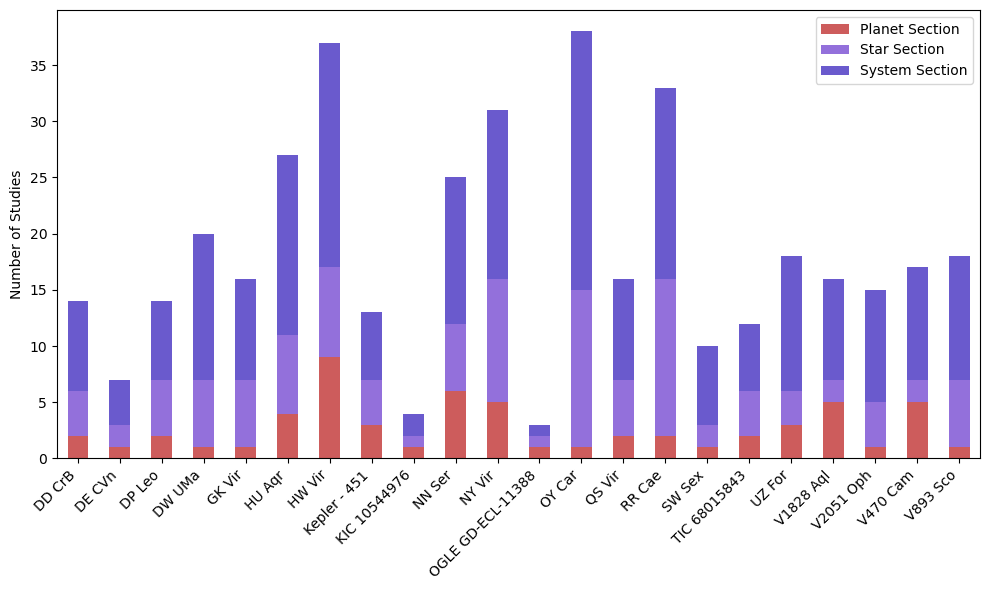

In [9]:
# Manually defining the custom system labels as provided

df_merged = Reference.merge(System, on='Reference', how='left', suffixes=('', '_system')) \
                        .merge(Planet, on='Reference', how='left') \
                        .merge(Star, on='Reference', how='left')

df_merged['System_lower'] = df_merged['System'].str.strip().str.lower()
df_unique = df_merged.drop_duplicates(subset=['Reference', 'System_lower'])

df_unique['in_planet'] = df_unique['Planet'].notna().astype(int)
df_unique['in_star'] = df_unique['Star'].notna().astype(int)
df_unique['in_system'] = df_unique['System'].notna().astype(int)

grouped_data = df_unique.groupby('System_lower').sum(numeric_only=True)[['in_planet', 'in_star', 'in_system']]

custom_system_labels = [
    'DD CrB', 'DE CVn', 'DP Leo', 'DW UMa', 'GK Vir', 'HU Aqr', 'HW Vir', 
    'Kepler - 451', 'KIC 10544976', 'NN Ser', 'NY Vir', 'OGLE GD-ECL-11388', 
    'OY Car', 'QS Vir', 'RR Cae', 'SW Sex', 'TIC 68015843', 'UZ For', 
    'V1828 Aql', 'V2051 Oph', 'V470 Cam', 'V893 Sco'
]

grouped_data.index = custom_system_labels[:len(grouped_data.index)]  

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['indianred', 'mediumpurple', 'slateblue'], figsize=(10, 6))

plt.ylabel('Number of Studies')
plt.xticks(rotation=45, ha='right')
plt.legend(["Planet Section", "Star Section", "System Section"])

plt.tight_layout()
plt.savefig("Frequency", dpi=200, bbox_inches='tight')
plt.show()
